In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pylab as plt
import cv2
import random

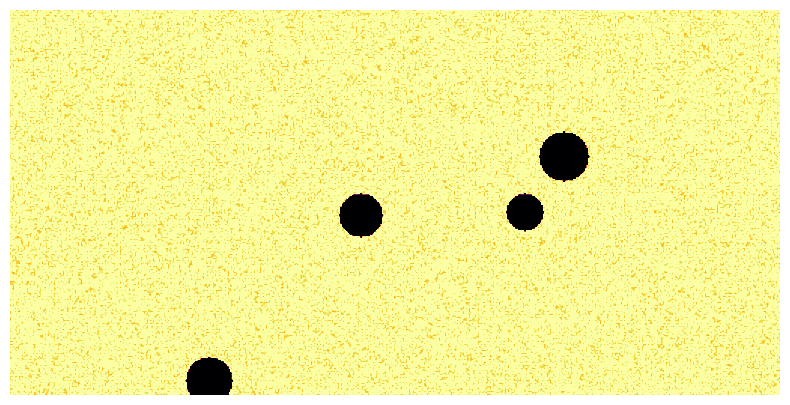

In [3]:
import numpy as np
import matplotlib.pyplot as plt

width = 512
height = 256

center_x, center_y = width // 2, height // 2
radius = width // 4
mask = np.ones((height, width))

background_noise = np.random.rand(height, width) * 0.01

hot_spots = np.random.rand(height, width) * 0.3 * mask

temperature = background_noise + hot_spots

# Add small circles
num_circles = 4
for _ in range(num_circles):
    x = np.random.randint(0, width)
    y = np.random.randint(0, height)
    radius = np.random.randint(10, 20)

    for i in range(height):
        for j in range(width):
            distance = np.sqrt((i - y) ** 2 + (j - x) ** 2)
            if distance <= radius:
                temperature[i, j] += 5

# Set background to black
temperature -= temperature.min()

cmap = 'inferno_r'
vmin, vmax = 0.2, 0.8
fig, ax = plt.subplots(figsize=(10, 5))
heatmap = ax.imshow(temperature, cmap=cmap, vmin=vmin, vmax=vmax)
# plt.colorbar(heatmap, label='Temperature')
plt.axis('off')
plt.savefig(f"dots.png", bbox_inches='tight')
plt.show()


In [4]:
image = cv2.imread('dots.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
def convertPixelsToLength(volume_in_pixels):
    # Conversion factor from pixel cubic to cubic meter
    conversion_factor = 0.00035342917 / 52707178.533289135
    # Convert the volume to cubic meter
    volume_in_cubic_meters = volume_in_pixels * conversion_factor
    volume_in_cubic_meters_rounded = round(volume_in_cubic_meters, 10)
    return volume_in_cubic_meters_rounded


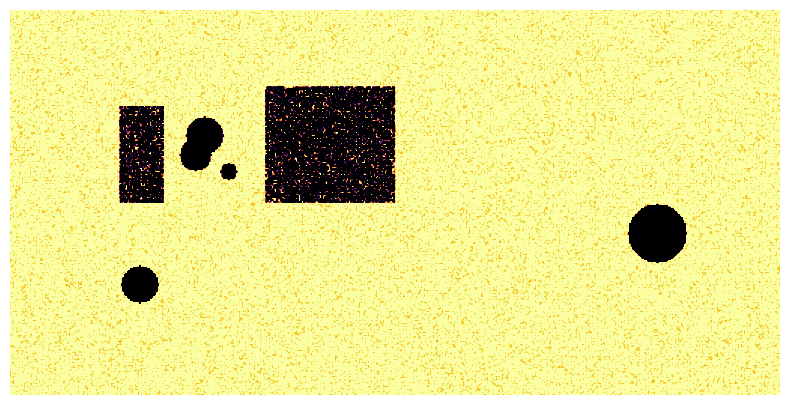

In [7]:
import numpy as np
import matplotlib.pyplot as plt

width = 512
height = 256

center_x, center_y = width // 2, height // 2
radius = width // 4
mask = np.ones((height, width))
# for i in range(height):
#     for j in range(width):
#         distance = np.sqrt(((i - center_y) ** 2) + ((j - center_x) ** 2))
#         mask[i, j] = 1 if distance <= radius else 0

background_noise = np.random.rand(height, width) * 0.01

hot_spots = np.random.rand(height, width) * 0.3 * mask
hot_spots[height // 5: height // 2, width // 3: width // 2] *= 10
hot_spots[height // 4: height // 2, width // 7: width // 5] *= 10

temperature = background_noise + hot_spots

# Add small circles
num_circles = 5
for _ in range(num_circles):
    x = np.random.randint(0, width)
    y = np.random.randint(0, height)
    radius = np.random.randint(5, 20)

    for i in range(height):
        for j in range(width):
            distance = np.sqrt((i - y) ** 2 + (j - x) ** 2)
            if distance <= radius:
                temperature[i, j] += 5

# Set background to black
temperature -= temperature.min()

cmap = 'inferno_r'
vmin, vmax = 0.2, 0.8
fig, ax = plt.subplots(figsize=(10, 5))
heatmap = ax.imshow(temperature, cmap=cmap, vmin=vmin, vmax=vmax)
# plt.colorbar(heatmap, label='Temperature')
plt.axis('off')
plt.savefig(f"dots.png", bbox_inches='tight')
plt.show()


In [8]:
image = cv2.imread('dots.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Number of blobs: 5


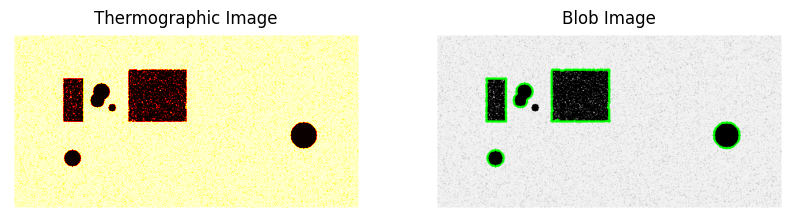

In [9]:
image = gray_image

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filtered_contours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:
        filtered_contours.append(cnt)


num_blobs = len(filtered_contours)
print("Number of blobs:", num_blobs)


image_with_contours = cv2.drawContours(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), filtered_contours, -1, (0, 255, 0), 3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(image, cmap='hot')
plt.title("Thermographic Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Blob Image")
plt.show()

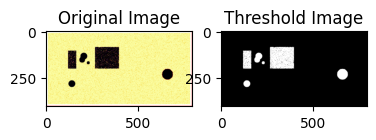

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('./dots.png')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)


sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown == 255] = 0

cv2.watershed(img, markers)

img[markers == -1] = [0, 0, 255] 
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(132), plt.imshow(thresh, cmap='gray'), plt.title('Threshold Image')

plt.show()
